In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
torch.manual_seed(2018)
plt.rcParams['font.sans-serif']=['SimHei'] # 用于正常显示中文标签
plt.rcParams['axes.unicode_minus']=False   # 用来正常显示负号

In [2]:
lrf_1 = -2
lrf_2 = -3.441
lrf_3 = -4
epoches = 273
X=np.linspace(0,epoches,1000,endpoint=True)

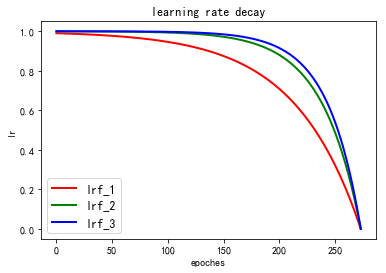

In [3]:
lf_1 =[1 - 10 ** (lrf_1 * (1 - x / epoches)) for x in X]
lf_2 =[1 - 10 ** (lrf_2 * (1 - x / epoches)) for x in X]
lf_3 =[1 - 10 ** (lrf_3 * (1 - x / epoches)) for x in X]

plt.plot(X,lf_1,label='lrf_1', color = 'red', linewidth = 2)
plt.plot(X,lf_2,label='lrf_2', color = 'green', linewidth = 2)
plt.plot(X,lf_3,label='lrf_3', color = 'blue', linewidth = 2)

plt.xlabel('epoches')
plt.ylabel('lr')
plt.title('learning rate decay')
plt.legend(loc="lower left",fontsize=12)
plt.show()

In [4]:
a = torch.ones([1,2])
b = torch.ones([1,2])
torch.stack([a,b],1)

tensor([[[1., 1.],
         [1., 1.]]])

In [5]:
# 定义一个多变量函数
w_target = np.array([0.5, 3, 2.4]) # 定义参数
b_target = np.array([0.9]) # 定义参数

f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(b_target[0], w_target[0], w_target[1], w_target[2])
print(f_des)

y = 0.90 + 0.50 * x + 3.00 * x^2 + 2.40 * x^3


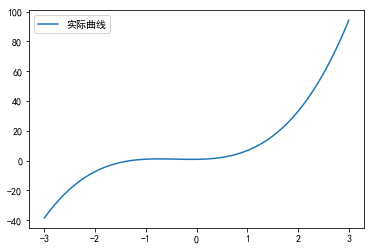

In [6]:
# 画出这个函数的曲线
x_samples = np.arange(-3, 3.1, 0.1)
y_samples = b_target[0] + w_target[0] * x_samples + w_target[1] * x_samples ** 2 + w_target[2] * x_samples ** 3
plt.plot(x_samples, y_samples, label='实际曲线')
plt.legend()
plt.show()

In [7]:
# 构建数据x 和 y
# x是一个如下矩阵 [x, x^2, x^3]
# y 是函数的结果[y]

x_train = np.stack([x_samples ** i for i in range(1, 4)], axis=1)
x_train = torch.from_numpy(x_train).float() # 转换成float tensor
y_train = torch.from_numpy(y_samples).float().unsqueeze(1) # 转换成float tensor

In [8]:
# 定义参数和模型
w = Variable(torch.randn(3,1), requires_grad=True)
b = Variable(torch.zeros(1), requires_grad=True)

# 将x和y转换成Variable
x_train = Variable(x_train)
y_train = Variable(y_train)

def multi_linear(x):
    return torch.mm(x, w) + b

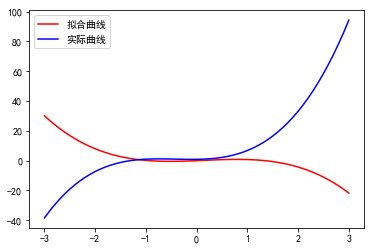

In [9]:
# 画出更新之前的模型
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='拟合曲线', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_samples, label='实际曲线', color='b')
plt.legend()

In [10]:
# 计算误差
def get_loss(y_, y):
    return torch.mean((y_ - y) ** 2)

In [11]:
# 这两条曲线的误差和一元的线性模型的误差是相同的，前面已经定义过get_loss
loss = get_loss(y_pred, y_train)
print(loss)

tensor(1437.5126, grad_fn=<MeanBackward1>)


In [12]:
# 自动求导
loss.backward()

In [13]:
# 查看一下w 和 b的梯度
print(w.grad)
print(b.grad)

tensor([[-116.0015],
        [ -93.1415],
        [-775.9386]])
tensor([-17.4977])


In [14]:
# 更新一下参数
w.data = w.data - 0.001*w.grad.data
b.data = b.data - 0.001*b.grad.data

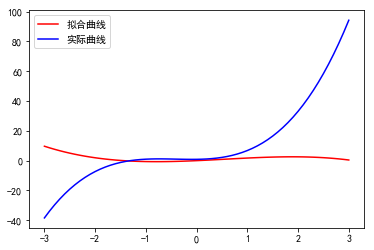

In [15]:
# 画出更新后的模型
y_pred = multi_linear(x_train)
plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='拟合曲线', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_samples, label='实际曲线', color='b')
plt.legend()

In [16]:
# 100 次迭代
epoch = 0
while(True):
    y_pred = multi_linear(x_train)
    loss = get_loss(y_pred, y_train)
    
    w.grad.data.zero_()
    b.grad.data.zero_()
    loss.backward()
    
    w.data = w.data - 0.001*w.grad.data
    b.data = b.data - 0.001*b.grad.data

    if (epoch + 1) % 100 == 0:
        print('epoch :{} , loss : {}'.format(epoch+1, loss.data))
    epoch += 1
    
    if loss.data < 0.002:
        print('epoch :{} , loss : {}'.format(epoch+1, loss.data))
        break

epoch :100 , loss : 0.9513922929763794
epoch :200 , loss : 0.7133966088294983
epoch :300 , loss : 0.5887182354927063
epoch :400 , loss : 0.48588797450065613
epoch :500 , loss : 0.40103185176849365
epoch :600 , loss : 0.33100783824920654
epoch :700 , loss : 0.27322065830230713
epoch :800 , loss : 0.22552984952926636
epoch :900 , loss : 0.18617059290409088
epoch :1000 , loss : 0.1536857783794403
epoch :1100 , loss : 0.12687432765960693
epoch :1200 , loss : 0.10474417358636856
epoch :1300 , loss : 0.08647790551185608
epoch :1400 , loss : 0.07139997184276581
epoch :1500 , loss : 0.058953605592250824
epoch :1600 , loss : 0.0486786812543869
epoch :1700 , loss : 0.04019644483923912
epoch :1800 , loss : 0.03319372236728668
epoch :1900 , loss : 0.02741210348904133
epoch :2000 , loss : 0.022638564929366112
epoch :2100 , loss : 0.018697291612625122
epoch :2200 , loss : 0.015442759729921818
epoch :2300 , loss : 0.012755356729030609
epoch :2400 , loss : 0.01053608302026987
epoch :2500 , loss : 0.00

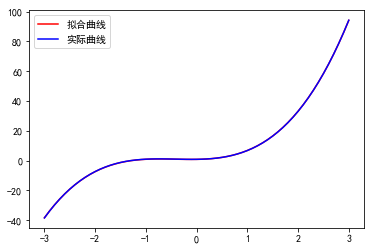

In [17]:
# 画出更新后的结果
y_pred = multi_linear(x_train)
plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='拟合曲线', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_samples, label='实际曲线', color='b')
plt.legend()